## Context
This dataset is created for prediction of Graduate Admissions from an Indian perspective.
<img src="img/gettyimages-988845006-640x640.jpg" width="600">
<a href="https://www.gettyimages.com/videos/ucla?phrase=ucla&sort=mostpopular">Attribution to image site</a>

Note: This Dataset can be acquired through [Kaggle](https://www.kaggle.com/mohansacharya/graduate-admissions).
#### Content
The dataset contains several parameters which are considered important during the application for Masters Programs.
The parameters included are :

- **GRE** score range is 130-170 for the main sections of Verbal Reasoning and Quantitative Reasoning.

- **TOEFL** test is scored on a scale of 0 to 120 points. Each of the four sections (Reading, Listening, Speaking, and Writing) receives a scaled score from 0 to 30.

- **University Rating** ( out of 5 )

- **SOP** & **LOR** - A Statement of Purpose is a sentence that you write, which states, in some detail, what you want to learn about in your research project. ( out of 5 )

- **Cumulative Grade Point Average (CGPA)** is the average of Grade Points obtained for all semesters and courses completed up to a given academic term, whereas the Grade Point Average (GPA) may only refer to one term. (out of 10)

- **Research** Experience ( either 0 or 1 )

- **Chance of Admit** ( ranging from 0 to 1 )



In this notebook, we're going to use values greater than or equal to 0.8 as the values of passing. 

**Acknowledgements**

This dataset is inspired by the UCLA Graduate Dataset. The test scores and GPA are in the older format.
The dataset is owned by Mohan S Acharya.

**Inspiration**

This dataset was built with the purpose of helping students in shortlisting universities with their profiles. The predicted output gives them a fair idea about their chances for a particular university.

**Citation**

Please cite the following if you are interested in using the dataset :
Mohan S Acharya, Asfia Armaan, Aneeta S Antony : A Comparison of Regression Models for Prediction of Graduate Admissions, IEEE International Conference on Computational Intelligence in Data Science 2019

I would like to thank all of you for contributing to this dataset through discussions and questions. I am in awe of the number of kernels built on this dataset. Some results and visualisations are fantastic and makes me a proud owner of the dataset. Keep em' coming! Thank You.

 ## Summary
 


- Having a higher university rating can be a factor of passing

- Anything higher than 4 in LOR and SOP have a higher probability to pass

- A higher correlation between CGPA - GRE Score and TOEFL Score have a high chance of passing.
<br><br><br>        

Both Logistic Regression and Random Forest Classifier have the best results. (scroll down the bottom to see the report)


<br><br>


<table>
    <tr>
        <td>
            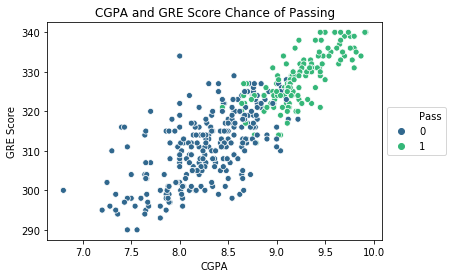
        </td>
        <td>
            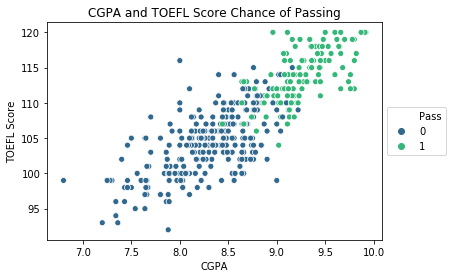
        </td>
    </tr>
    <tr>
        <td>
            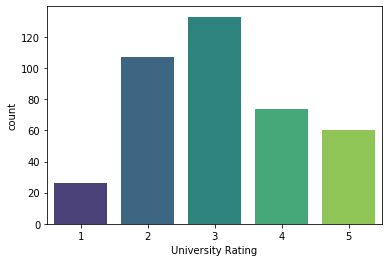
        </td>
        <td>
            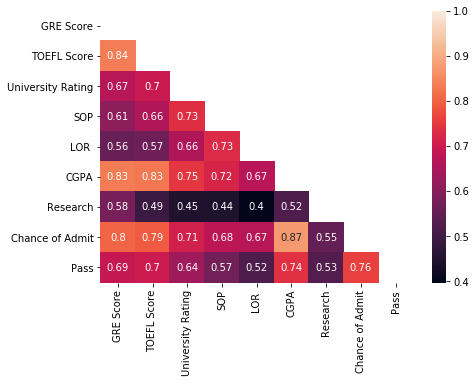
        </td>
    </tr>
</table>




### Import libraries and dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm.notebook import tqdm as tqdm
%matplotlib inline

In [2]:
df = pd.read_csv('Admission_Predict.csv')
dfv1 = pd.read_csv('Admission_Predict_Ver1.1.csv')
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [3]:
# shows first 5 rows in the dataset

df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
# shows the row information and numerical counts of each column

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [5]:
# shows values that can be of benefit in cleaning up the data set
# we use describe to check and look at the summary of the dataset,
# from here we can already tell that there are outliers based on the ratio of mean and max

df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [6]:
# clean the dataset and create a better a Pass or Fail column
df.drop('Serial No.',axis=1, inplace=True)
df.rename(columns ={ 'Chance of Admit ': 'Chance of Admit'}, inplace=True)
df['Pass'] = (df['Chance of Admit'] >= 0.8)*1

### Visualizations

for distribution variables if pass or fail, I've used and edited a template to make things easier

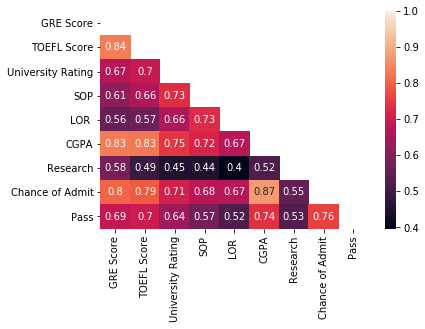

In [7]:
# matrix shows correlation values between columns

matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot=True, mask=matrix)
plt.savefig("matrix.png", bbox_inches='tight')

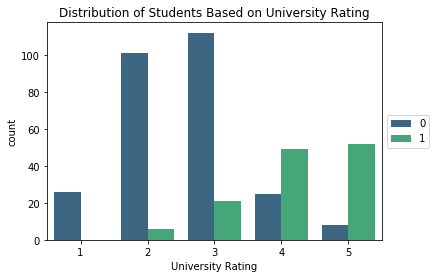

In [8]:
sns.countplot(df['University Rating'],hue=df['Pass'], palette='viridis')
plt.title('Distribution of Students Based on University Rating')
plt.legend(loc='center left', bbox_to_anchor=(1, .5))
plt.savefig("count.png", bbox_inches='tight')
plt.show()

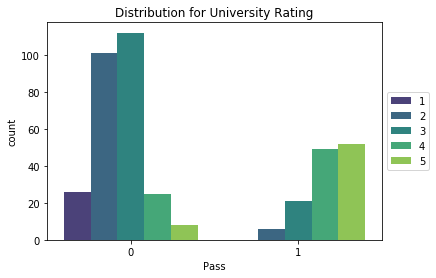

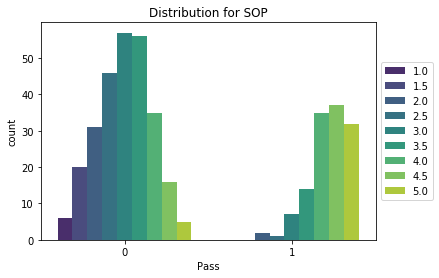

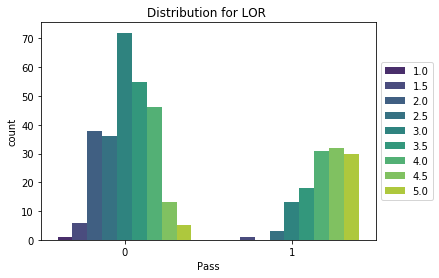

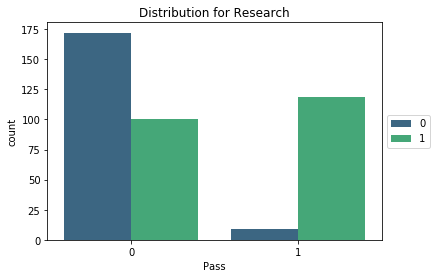

In [9]:
df_cat = df[['University Rating', 'SOP',  'LOR ',  'Research', ]]
for i in tqdm(df_cat.columns):
    sns.countplot(x='Pass',hue=i, data=df, palette='viridis')
    plt.legend(loc='center left', bbox_to_anchor=(1, .5))
    plt.title('Distribution for ' + i)
    #chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
    plt.savefig(i+".png", bbox_inches='tight')
    plt.show()

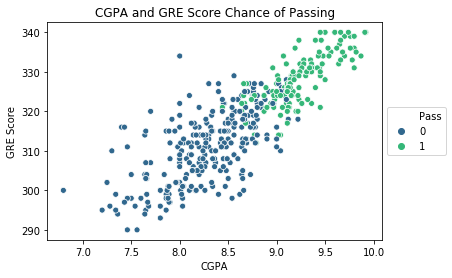

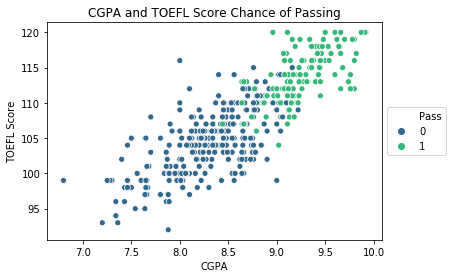

In [10]:
df_cat = df[['GRE Score', 'TOEFL Score', ]]
for i in tqdm(df_cat.columns):
    sns.scatterplot(x='CGPA',y=i,hue='Pass', data=df, palette='viridis')
    plt.legend(loc='center left', bbox_to_anchor=(1, .5))
    plt.title('CGPA and ' + i + ' Chance of Passing')
    #chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
    plt.savefig(i+".png", bbox_inches='tight')
    plt.show()

### Explaratory Data Analysis

from here we can speculate and create a story on how we can create a conclusion

> Having a higher university rating can be a factor of passing

> Anything higher than 4 in LOR and SOP have a higher probability to pass

> A higher correlation between CGPA - GRE Score and TOEFL Score have a high chance of passing.


## Applying Classification Models

In [11]:
# splitting our X data and y data

X = df[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA','Research']].values
y = df['Pass'].values

In [12]:
# Splitting Training and Testing

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

**Feature scaling** is a method used to normalize the range of independent variables or features of data. In data processing, it is also known as data normalization and is generally performed during the data preprocessing step.

In [13]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

#Logistic Regression
lr_classifier = LogisticRegression()
lr_classifier.fit(X_train, y_train)

# KNN
KN_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
KN_classifier.fit(X_train, y_train)

# Support Vector Machine
SVC_classifier = SVC(kernel = 'linear')
SVC_classifier.fit(X_train, y_train)

# Naive Bayes
NB_classifier = GaussianNB()
NB_classifier.fit(X_train, y_train)

# Random Forest Classifier
RF_classifier = RandomForestClassifier(n_estimators=10, criterion='entropy')
RF_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [15]:
# Predicting Test Results

y_pred_lr = lr_classifier.predict(X_test)
y_pred_KN = KN_classifier.predict(X_test)
y_pred_SVC = SVC_classifier.predict(X_test)
y_pred_NB = NB_classifier.predict(X_test)
y_pred_RF = RF_classifier.predict(X_test)

## Getting the results

**Accuracy** - Accuracy is the most intuitive performance measure and it is simply a ratio of correctly predicted observation to the total observations. One may think that, if we have high accuracy then our model is best. Yes, accuracy is a great measure but only when you have symmetric datasets where values of false positive and false negatives are almost same. 

Accuracy = TP+TN/TP+FP+FN+TN

**Precision** - Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. 

Precision = TP/TP+FP

**Recall (Sensitivity)** - Recall is the ratio of correctly predicted positive observations to the all observations in actual class - yes. 

Recall = TP/TP+FN

**F1 score** - F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution. Accuracy works best if false positives and false negatives have similar cost. If the cost of false positives and false negatives are very different, it’s better to look at both Precision and Recall. 

In [16]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

### Logistic Regression

In [17]:
print(confusion_matrix(y_test,y_pred_lr))
print(classification_report(y_test,y_pred_lr))

[[75  8]
 [ 2 15]]
              precision    recall  f1-score   support

           0       0.97      0.90      0.94        83
           1       0.65      0.88      0.75        17

    accuracy                           0.90       100
   macro avg       0.81      0.89      0.84       100
weighted avg       0.92      0.90      0.91       100



### K-Nearest Neighbors

In [18]:
from sklearn.metrics import confusion_matrix

In [19]:
print(confusion_matrix(y_test,y_pred_KN))
print(classification_report(y_test, y_pred_KN))

[[76  7]
 [ 1 16]]
              precision    recall  f1-score   support

           0       0.99      0.92      0.95        83
           1       0.70      0.94      0.80        17

    accuracy                           0.92       100
   macro avg       0.84      0.93      0.88       100
weighted avg       0.94      0.92      0.92       100



### Support Vector Classifier

In [20]:
print(confusion_matrix(y_test,y_pred_SVC))
print(classification_report(y_test, y_pred_SVC))

[[74  9]
 [ 1 16]]
              precision    recall  f1-score   support

           0       0.99      0.89      0.94        83
           1       0.64      0.94      0.76        17

    accuracy                           0.90       100
   macro avg       0.81      0.92      0.85       100
weighted avg       0.93      0.90      0.91       100



### Naive Bayes

In [21]:
print(confusion_matrix(y_test,y_pred_NB))
print(classification_report(y_test, y_pred_NB))

[[75  8]
 [ 1 16]]
              precision    recall  f1-score   support

           0       0.99      0.90      0.94        83
           1       0.67      0.94      0.78        17

    accuracy                           0.91       100
   macro avg       0.83      0.92      0.86       100
weighted avg       0.93      0.91      0.92       100



### Random Forest Classifier

In [22]:
print(confusion_matrix(y_test,y_pred_RF))
print(classification_report(y_test, y_pred_RF))

[[77  6]
 [ 2 15]]
              precision    recall  f1-score   support

           0       0.97      0.93      0.95        83
           1       0.71      0.88      0.79        17

    accuracy                           0.92       100
   macro avg       0.84      0.91      0.87       100
weighted avg       0.93      0.92      0.92       100



References

 - https://heartbeat.fritz.ai/seaborn-heatmaps-13-ways-to-customize-correlation-matrix-visualizations-f1c49c816f07

 - https://blog.exsilio.com/all/accuracy-precision-recall-f1-score-interpretation-of-performance-measures/
 
 - https://en.wikipedia.org/wiki/Feature_scaling